In [1]:
import matplotlib
from PyEMD import EMD, EEMD, CEEMDAN
from sklearn.preprocessing_d02 import RobustScaler, QuantileTransformer, StandardScaler
%load_ext autoreload 
%autoreload 2
%matplotlib widget
import matplotlib.pyplot as plt
#matplotlib.use("nbagg")
from rbm_robust.data_loading.datasets import D02Dataset, RadarDatasetRaw
import pandas as pd
import numpy as np
from scipy import signal
from neurokit2 import ecg_peaks
from emrad_toolbox.plotting.radar_plotting.RadarPlotter import RadarPlotter
from emrad_toolbox.radar_preprocessing.radar import RadarPreprocessor
from sklearn.preprocessing_d02 import MinMaxScaler
from pathlib import Path
import os

In [2]:
base_path = "/Users/simonmeske/Desktop/TestOrdner"
dataset = D02Dataset(base_path)
subset = dataset[10]

In [3]:
dataset.subjects

['134',
 '203',
 '518',
 '144',
 '162',
 '249',
 '004',
 '469',
 '005',
 '230',
 '060',
 '115']

In [4]:
start_time = "11:04:40"
end_time = "11:05:00"

In [5]:
synced = subset.load_synced_window.copy()

radar
Measured sampling rate: 1953.8266019417474
Sync frequency: 0.1999281817597273
ecg
Measured sampling rate: 1999.0608357628769
Sync frequency: 0.20009396054590453
60
Shift: radar_aligned_ 17
shortest:419777
419777
419794
4002
Diff in Sync Signals: False
631
Shift: radar_aligned_ 0
shortest:419370
419370
419370
7598
Diff in Sync Signals: False
979
Shift: radar_aligned_ 7
shortest:419022
419022
419029
11516
Diff in Sync Signals: False
1359
Shift: radar_aligned_ -4
shortest:418638
418642
418638
15086
Diff in Sync Signals: False
1727
Shift: radar_aligned_ 7
shortest:418274
418274
418281
19145
Diff in Sync Signals: False
2063
Shift: radar_aligned_ 2
shortest:417938
417938
417940
22888
Diff in Sync Signals: False
2420
Shift: radar_aligned_ 0
shortest:417581
417581
417581
26722
Diff in Sync Signals: False
2817
Shift: radar_aligned_ 9
shortest:417184
417184
417193
30507
Diff in Sync Signals: False
3195
Shift: radar_aligned_ 0
shortest:416806
416806
416806
34052
Diff in Sync Signals: False


In [ ]:
fig, axs = plt.subplots(nrows=2)
synced[["ecg_Sync_Out", "radar_Sync_In"]].first("30s").plot(ax=axs[0])
synced[["ecg_Sync_Out", "radar_Sync_In"]].last("30s").plot(ax=axs[1])
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots()
synced[["ecg_Sync_Out", "radar_Sync_In"]].iloc[int((len(synced) / 2) - 5000) : int((len(synced) / 2) + 5000)].plot(ax=ax)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots()
synced[["ecg_Sync_Out", "radar_Sync_In"]].plot(ax=ax) #.iloc[int((len(synced) / 2) - 5000) : int((len(synced) / 2) + 5000)]
fig.tight_layout()

In [ ]:
print(RadarPreprocessor.check_sync(synced['ecg_Sync_Out'],synced['radar_Sync_In']))

In [ ]:
len(synced['radar_Sync_In'])

In [ ]:
len(synced['ecg_Sync_Out'])

In [ ]:
synced_window.head()

In [ ]:
fig, ax = plt.subplots()
synced_window[['ecg_Sync_Out', 'radar_Sync_In']].plot(ax=ax)

In [ ]:
len(synced_window)

In [ ]:
print(RadarPreprocessor.check_sync(first_signal=synced_window['ecg_Sync_Out'], second_signal=synced_window['radar_Sync_In']))

In [ ]:
synced = subset.synced_data.between_time(start_time, end_time).copy()
fig, ax = plt.subplots()
synced[['ecg_Sync_Out', 'radar_Sync_In']].plot(ax=ax)

In [ ]:
print(RadarPreprocessor.check_sync(first_signal=synced['ecg_Sync_Out'], second_signal=synced['radar_Sync_In']))

In [ ]:
filtered_synced = subset.synced_filtered_data.between_time(start_time, end_time)

## Complete Session

In [ ]:
filtered_synced_comp = subset.synced_filtered_data
fig, ax = plt.subplots()
filtered_synced_comp[['Magnitude_band_pass','ecg']].plot(ax=ax)
fig.tight_layout()

In [ ]:
filtered_synced_comp = subset.synced_filtered_data.between_time(start_time, end_time).copy()
RadarPlotter.plot_wavelet(filtered_synced_comp['Magnitude_band_pass'], plot_magnitude=True, sampling_rate=1000, log_scale=False);

In [ ]:
subset.synced_data.describe()

In [ ]:
subset.synced_data.describe()
print(len(subset.synced_data))
print(subset.synced_data['ecg'].value_counts())

## Sync

## Magnitude

In [ ]:
filtered_synced_comp = subset.synced_filtered_data.between_time(start_time, end_time).copy()
filtered_synced_comp.head()

In [ ]:
fig, ax = plt.subplots()
filtered_synced_comp = subset.synced_filtered_data.between_time(start_time, end_time).copy()
min_max_scaler = MinMaxScaler()
filtered_synced_comp.loc[:,'Magnitude_Filtered_Envelope'] = min_max_scaler.fit_transform(filtered_synced_comp[['Magnitude_Filtered_Envelope']])
filtered_synced_comp.loc[:, 'ecg'] = min_max_scaler.fit_transform(filtered_synced_comp[['ecg']])
filtered_synced_comp.loc[:,'Magnitude_band_pass'] = min_max_scaler.fit_transform(filtered_synced_comp[['Magnitude_band_pass']])
filtered_synced_comp[['Magnitude_band_pass','Magnitude_Filtered_Envelope','ecg']].plot(ax=ax) #
fig.tight_layout()

In [ ]:
synced = subset.synced_data.between_time(start_time, end_time).copy()
fig, ax = plt.subplots()
synced[['ecg_sync', 'radar_Sync_In']].plot(ax=ax)

## Angle

In [ ]:
fig, ax  = plt.subplots()
synced = subset.synced_data.between_time(start_time, end_time)
ax.scatter(synced[['radar_I']], synced[['radar_Q']])

## EMD

## Magnitude

In [ ]:
max_imfs = -1
sampling_rate = 1000
log_scaling = False

In [ ]:
filtered_synced = subset.synced_filtered_data.between_time(start_time, end_time).copy()
r_peaks = ecg_peaks(filtered_synced['ecg'], sampling_rate=1000)[0]['ECG_R_Peaks']
emd = EMD()
imfs = emd.emd(filtered_synced['Magnitude_band_pass'].to_numpy(), np.arange(len(filtered_synced)) / sampling_rate, max_imf=max_imfs)
num_imfs = imfs.shape[0]
for i in range(num_imfs):
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(9, 10))
    ax1.scatter(np.arange(len(filtered_synced)) / sampling_rate, r_peaks / 62, c='red', marker='x')
    RadarPlotter.plot_wavelet(imfs[i], sampling_rate=sampling_rate, signal_type=f"Compression Band Pass (18 to 80 Hz) Start: {start_time} End: {end_time}", log_scale=log_scaling, wavelet_coefficients=(50,200), ax=ax1,  **{"color_bar": False})
    ax2.plot(np.arange(len(filtered_synced)) / sampling_rate, filtered_synced['ecg'])
    fig.tight_layout()

In [ ]:
RadarPlotter.plot_emd(radar_signal=filtered_synced['Magnitude_band_pass'].to_numpy(), sampling_rate=sampling_rate, signal_type="Synced Band pass filtered (18 to 80 Hz)", max_imfs=max_imfs);

### Test with EMD of I and Q seperately and then combining the signals

In [ ]:
filtered_synced = subset.synced_filtered_data.between_time(start_time, end_time).copy()
emd = EMD()
I_imfs = emd.emd(filtered_synced['radar_I'].to_numpy(), np.arange(len(filtered_synced)) / sampling_rate, max_imf=max_imfs)
Q_imfs = emd.emd(filtered_synced['radar_Q'].to_numpy(), np.arange(len(filtered_synced)) / sampling_rate, max_imf=max_imfs)
num_imfs = I_imfs.shape[0]

In [ ]:
for i in range(I_imfs.shape[0]):
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(9, 10))
    ax1.scatter(np.arange(len(filtered_synced)) / sampling_rate, r_peaks / 62, c='red', marker='x')
    RadarPlotter.plot_wavelet(I_imfs[i], sampling_rate=sampling_rate, signal_type=f"Compression Band Pass (18 to 80 Hz) Start: {start_time} End: {end_time}", log_scale=True, wavelet_coefficients=(50,200), ax=ax1,  **{"color_bar": False})
    ax2.plot(np.arange(len(filtered_synced)) / sampling_rate, filtered_synced['ecg'])
    fig.tight_layout()

In [ ]:
for i in range(Q_imfs.shape[0]):
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(9, 10))
    ax1.scatter(np.arange(len(filtered_synced)) / sampling_rate, r_peaks / 62, c='red', marker='x')
    RadarPlotter.plot_wavelet(Q_imfs[i], sampling_rate=sampling_rate, signal_type=f"Compression Band Pass (18 to 80 Hz) Start: {start_time} End: {end_time}", log_scale=True, wavelet_coefficients=(50,200), ax=ax1,  **{"color_bar": False})
    ax2.plot(np.arange(len(filtered_synced)) / sampling_rate, filtered_synced['ecg'])
    fig.tight_layout()

In [ ]:
#num_imfs = imfs.shape[0]
#num_samples = imfs.shape[1]
#time = np.linspace(0, num_samples / sampling_rate, num_samples)
#fig, axs = plt.subplots(num_imfs, 1, figsize=(10, 2 * num_imfs))
#for i in range(num_imfs):
#    axs[i].plot(time, np.absolute([complex(i, q) for i, q in zip(I_imfs[i], Q_imfs[i])]))
#    axs[i].set_title(f"IMF {i + 1}")
#fig.tight_layout()

## Angle

In [ ]:
num_imfs = imfs.shape[0]
num_samples = imfs.shape[1]
time = np.linspace(0, num_samples / sampling_rate, num_samples)
fig, axs = plt.subplots(num_imfs, 1, figsize=(10, 2 * num_imfs))
emd = EMD()
angle = RadarPreprocessor.calculate_angle(i=synced['radar_I'], q = synced['radar_Q'])
angle_imfs = emd.emd(angle , np.arange(len(filtered_synced)) / sampling_rate, max_imf=max_imfs)
for i in range(angle_imfs.shape[0]):
    axs[i].plot(time, angle_imfs[i])
    axs[i].set_title(f"IMF {i + 1}")
fig.tight_layout()

## First Derivative

In [ ]:
synced = subset.synced_data.between_time(start_time, end_time).copy()
synced['radar_I'] = synced['radar_I'].diff() / synced.index.to_series().diff().dt.total_seconds()
synced['radar_Q'] = synced['radar_Q'].diff() / synced.index.to_series().diff().dt.total_seconds()
synced = synced.drop(synced.index[0])
filtered_dict = RadarPreprocessor.butterworth_band_pass_filter(i=synced['radar_I'], q=synced['radar_Q'], fs=1000, filter_cutoff=(18,80)) 
RadarPlotter.plot_wavelet(filtered_dict['Magnitude_band_pass'], sampling_rate=1000, signal_type=f"First Derivative (18 to 80 Hz) Start: {start_time} End: {end_time}", log_scale=False);

In [ ]:
filtered_synced = subset.synced_filtered_data.between_time(start_time, end_time).copy()
emd = EMD()
derivative_imfs = emd.emd(filtered_dict['Magnitude_band_pass'], np.arange(len(filtered_dict['Magnitude_band_pass'])) / sampling_rate, max_imf=max_imfs)
for i in range(derivative_imfs.shape[0]):
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(9, 10))
    ax1.scatter(np.arange(len(filtered_dict['Magnitude_band_pass']) +1 ) / sampling_rate, r_peaks / 62, c='red', marker='x')
    RadarPlotter.plot_wavelet(derivative_imfs[i], sampling_rate=sampling_rate, signal_type=f"Compression Band Pass (18 to 80 Hz) Start: {start_time} End: {end_time}", log_scale=False, wavelet_coefficients=(50,200), ax=ax1,  **{"color_bar": False})
    ax2.plot(np.arange(len(filtered_dict['Magnitude_band_pass']) + 1) / sampling_rate, filtered_synced['ecg'])
    fig.tight_layout()

In [ ]:
RadarPlotter.plot_emd(filtered_dict['Magnitude_band_pass'], sampling_rate=1000);

# Sleep Positions

In [144]:
path_sleep_positions = Path("/Users/simonmeske/Desktop/Masterarbeit/SleepPositionData")
sleep_pos_dataset = RadarDatasetRaw(path_sleep_positions)

In [7]:
sleep_pos_dataset.subjects

['04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '19',
 '20',
 '21']

In [8]:
len(sleep_pos_dataset.subjects)

15

In [145]:
subset_sleep = sleep_pos_dataset.get_subset(Subject="07")
#subset.synced_data.head()

In [10]:
radar_data = subset_sleep.radar_raw
ecg_data = subset_sleep.ecg_raw

Extracting EDF parameters from /Users/simonmeske/Desktop/Masterarbeit/SleepPositionData/Subject_07/Subject_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [11]:
ecg_data

,Sync_Out,ECG II
date (Europe/Berlin),,
2023-08-09 11:20:19+02:00,0.350958,0.000002
2023-08-09 11:20:19.003906304+02:00,1.266499,-0.000003
2023-08-09 11:20:19.007812608+02:00,3.189136,-0.000011
2023-08-09 11:20:19.011718656+02:00,4.013123,0.000009
2023-08-09 11:20:19.015624960+02:00,3.768978,0.000046
...,...,...
2023-08-09 12:07:55.980468736+02:00,2.182040,-0.000214
2023-08-09 12:07:55.984375040+02:00,-1.266499,-0.000174
2023-08-09 12:07:55.988281344+02:00,2.761883,0.000044


In [12]:
radar_data

node                                 rad1                            \
channel                                 I        Q Sync_In Sync_Out   
date (Europe/Berlin)                                                  
2023-08-09 11:23:44+02:00        -2340029 -2337254       0        0   
2023-08-09 11:23:44.000512+02:00 -2340323 -2336892       0        0   
2023-08-09 11:23:44.001024+02:00 -2340380 -2336648       0        0   
2023-08-09 11:23:44.001536+02:00 -2340439 -2337121       0        0   
2023-08-09 11:23:44.002048+02:00 -2340137 -2337198       0        0   
...                                   ...      ...     ...      ...   
2023-08-09 12:07:04.891904+02:00 -3457884 -2687978       0        0   
2023-08-09 12:07:04.892416+02:00 -3458094 -2688177       0        0   
2023-08-09 12:07:04.892928+02:00 -3457891 -2688390       0        0   
2023-08-09 12:07:04.893440+02:00 -3458081 -2687824       0        0   
2023-08-09 12:07:04.893952+02:00 -3458183 -2687738       0        0   

node                                   rad2                             \
channel                                   I         Q Sync_In Sync_Out   
date (Europe/Berlin)                                                     
2023-08-09 11:23:44+02:00         3115916.0  507767.0     0.0      0.0   
2023-08-09 11:23:44.000512+02:00  3116488.0  508008.0     0.0      0.0   
2023-08-09 11:23:44.001024+02:00  3116495.0  507219.0     0.0      0.0   
2023-08-09 11:23:44.001536+02:00  3116794.0  508478.0     0.0      0.0   
2023-08-09 11:23:44.002048+02:00  3116850.0  507582.0     0.0      0.0   
...                                     ...       ...     ...      ...   
2023-08-09 12:07:04.891904+02:00        NaN       NaN     NaN      NaN   
2023-08-09 12:07:04.892416+02:00        NaN       NaN     NaN      NaN   
2023-08-09 12:07:04.892928+02:00        NaN       NaN     NaN      NaN   
2023-08-09 12:07:04.893440+02:00        NaN       NaN     NaN      NaN   
2023-08-09 12:07:04.893952+02:00        NaN       NaN     NaN      NaN   

node                                   rad3                             \
channel                                   I         Q Sync_In Sync_Out   
date (Europe/Berlin)                                                     
2023-08-09 11:23:44+02:00        -4180263.0 -928024.0     0.0      0.0   
2023-08-09 11:23:44.000512+02:00 -4179932.0 -928295.0     0.0      0.0   
2023-08-09 11:23:44.001024+02:00 -4179687.0 -928138.0     0.0      0.0   
2023-08-09 11:23:44.001536+02:00 -4179992.0 -928169.0     0.0      0.0   
2023-08-09 11:23:44.002048+02:00 -4180051.0 -928253.0     0.0      0.0   
...                                     ...       ...     ...      ...   
2023-08-09 12:07:04.891904+02:00        NaN       NaN     NaN      NaN   
2023-08-09 12:07:04.892416+02:00        NaN       NaN     NaN      NaN   
2023-08-09 12:07:04.892928+02:00        NaN       NaN     NaN      NaN   
2023-08-09 12:07:04.893440+02:00        NaN       NaN     NaN      NaN   
2023-08-09 12:07:04.893952+02:00        NaN       NaN     NaN      NaN   

node                                   rad4                              
channel                                   I          Q Sync_In Sync_Out  
date (Europe/Berlin)                                                     
2023-08-09 11:23:44+02:00         2539291.0 -1059656.0     0.0      0.0  
2023-08-09 11:23:44.000512+02:00  2539222.0 -1059670.0     0.0      0.0  
2023-08-09 11:23:44.001024+02:00  2539129.0 -1059660.0     0.0      0.0  
2023-08-09 11:23:44.001536+02:00  2539575.0 -1059222.0     0.0      0.0  
2023-08-09 11:23:44.002048+02:00  2539537.0 -1059242.0     0.0      0.0  
...                                     ...        ...     ...      ...  
2023-08-09 12:07:04.891904+02:00        NaN        NaN     NaN      NaN  
2023-08-09 12:07:04.892416+02:00        NaN        NaN     NaN      NaN  
2023-08-09 12:07:04.892928+02:00        NaN        NaN     NaN      NaN  
2023-08-09 12:07:04.893440+02:00        NaN

In [13]:
import neurokit2 as nk

In [146]:
radar_snippet = radar_data["rad1"].between_time("11:24", "12:06")
ecg_snippet = ecg_data.between_time("11:24", "12:06")
ecg_snippet = ecg_snippet.assign(Sync_Out_Binary=0.5 * (np.sign(ecg_snippet["Sync_Out"] - 0.5 * np.mean(ecg_snippet["Sync_Out"])) + 1))
ecg_snippet = ecg_snippet.assign(ECG_Clean=nk.ecg_clean(ecg_snippet["ECG II"], sampling_rate=256))

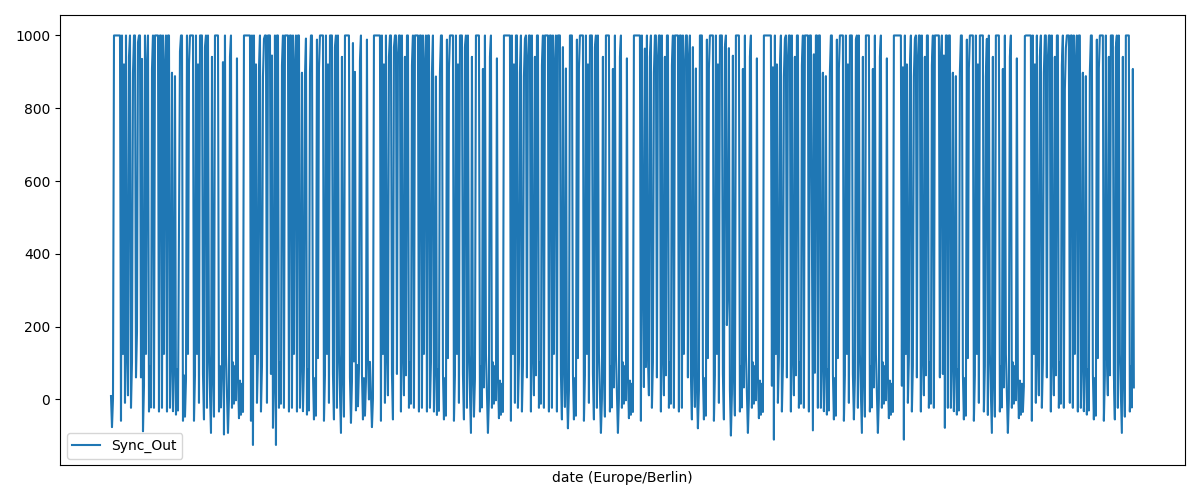

In [147]:
fig, ax = plt.subplots(figsize=(12,5))
ecg_snippet.iloc[0:1024][["Sync_Out"]].plot(ax=ax)
fig.tight_layout()

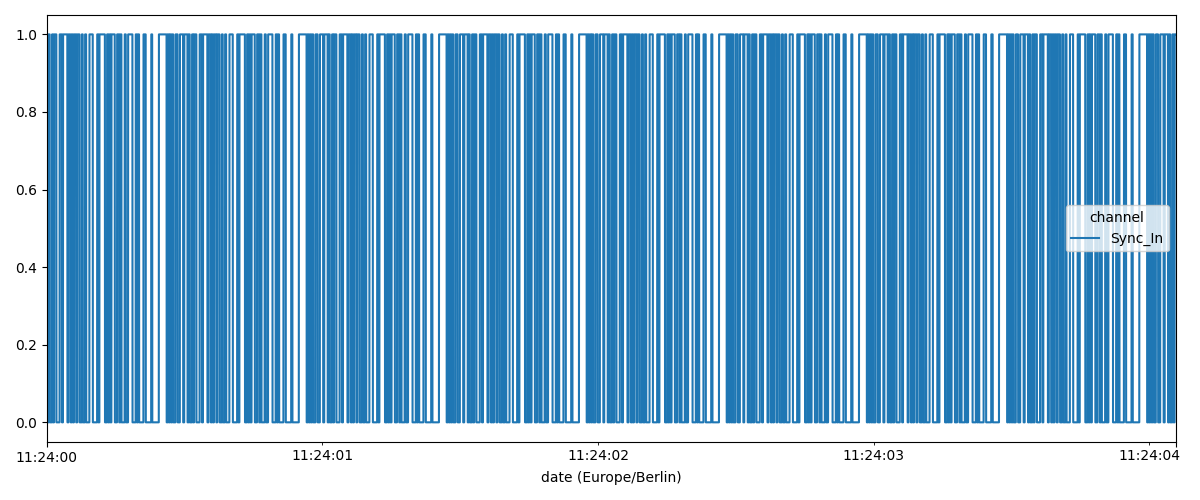

In [148]:
fig, ax = plt.subplots(figsize=(12,5))
radar_snippet.iloc[0:8000][["Sync_In"]].plot(ax=ax)
fig.tight_layout()

In [149]:
from empkins_io.sync import SyncedDataset

In [150]:
synced_dataset = SyncedDataset()

In [161]:
synced_dataset.add_dataset("ecg", ecg_snippet, "Sync_Out_Binary", subset_sleep.sampling_rate_biopac)
synced_dataset.add_dataset("radar", radar_snippet, "Sync_In", subset_sleep.sampling_rate_radar)

In [162]:
fft_sync, psd_sync = synced_dataset._determine_actual_sampling_rate(synced_dataset.datasets["ecg"], wave_frequency=250)

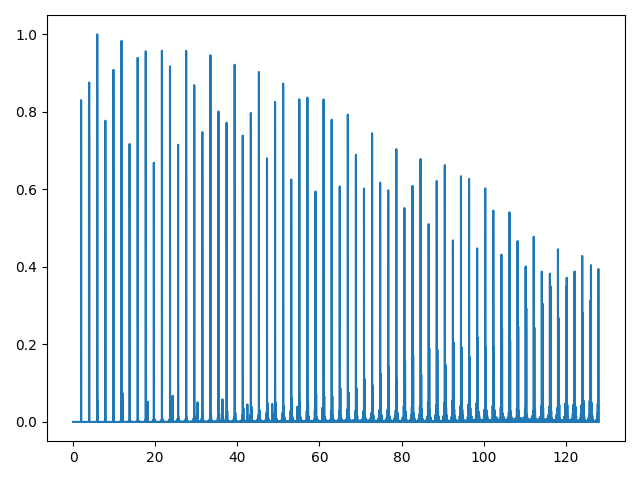

In [163]:
fig, ax = plt.subplots()
ax.plot(fft_sync, psd_sync)
fig.tight_layout()

In [167]:
np.mean(psd_sync)

0.00028184721034404654

In [141]:
fft_sync, psd_sync = synced_dataset._determine_actual_sampling_rate(synced_dataset.datasets["radar"], wave_frequency=250)

1953.125
2487167


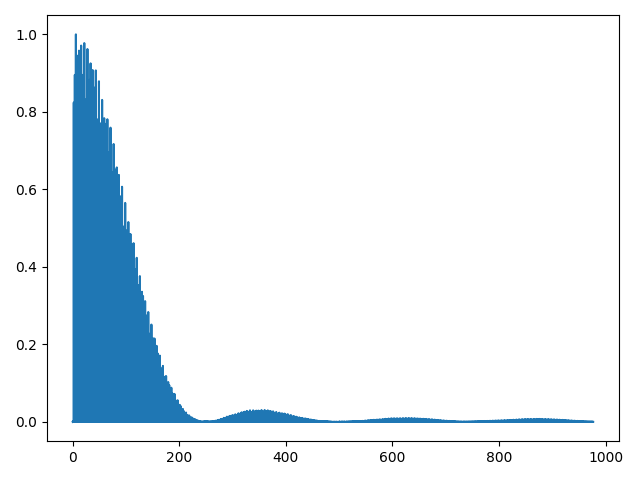

In [142]:
fig, ax = plt.subplots()
ax.plot(fft_sync, psd_sync)
fig.tight_layout()

In [ ]:
radar_snippet = radar_data["rad1"][["Sync_In"]].first("8min")#.between_time("09:23:30", "09:24:00")
ecg_snippet = ecg_data[["Sync_Out"]].first("8min")#.between_time("09:23:30", "09:24:00")#.first("30s")

In [ ]:
#fig, ax = plt.subplots()
#ecg_data[["ECG II"]].between_time("09:30:00", "09:30:30").plot(ax=ax)

In [ ]:
ecg_snippet = ecg_data[["Sync_Out"]].first("8min")
ecg_snippet = ecg_snippet.assign(Sync_Out_Binary=0.5 * (np.sign(ecg_snippet["Sync_Out"] - 1.0 * np.mean(ecg_snippet["Sync_Out"])) + 1))

In [ ]:
fig, ax = plt.subplots()
ecg_snippet_plot = ecg_snippet[["Sync_Out_Binary"]]#.reset_index(drop=True)
#ecg_snippet_plot.index /= subset.sampling_rate_biopac
ecg_snippet_plot.plot(ax=ax)

#radar_snippet = radar_snippet.reset_index(drop=True)
#radar_snippet.index /= subset.sampling_rate_radar
#radar_snippet.plot(ax=axs[1])

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots()

radar_snippet = radar_snippet.reset_index(drop=True)
radar_snippet.index /= subset_sleep.sampling_rate_radar
radar_snippet.plot(ax=ax)

fig.tight_layout()

In [ ]:
synced_sleep = subset_sleep.synced_data.copy()

In [ ]:
synced_sleep.columns

In [ ]:
fig, ax = plt.subplots()


In [ ]:
synced_sleep.columns

In [ ]:
synced_sleep.head()

In [ ]:
sleep_snippet = synced_sleep.first("8s")

In [ ]:
path_sleep_positions = Path("/Users/simonmeske/Desktop/Masterarbeit/SleepPositionData")
sleep_pos_dataset = RadarDatasetRaw(path_sleep_positions, exclude_missing=True)
subset_sleep = sleep_pos_dataset.get_subset(Subject="04")

In [ ]:
sleep_pos_dataset.subjects

In [ ]:
sleep_synced = subset_sleep.synced_data
sleep_snippet = sleep_synced.first("10min")
fig, ax = plt.subplots() #subset_sleep
ax.plot(sleep_snippet.index, sleep_snippet[('psg_aligned_','Sync_Out')], label="ecg")
ax.plot(sleep_snippet.index, sleep_snippet[('radar_1_aligned_','Sync_In')], label="radar")
ax.legend()
#sleep_snip^pet[[("psg_aligned_", "Sync_Out"), ("radar_1_aligned_", "Sync_In")]].plot(ax = ax)

In [ ]:
sleep_synced = subset.synced_data
sleep_synced_reduced = sleep_synced.between_time("10:01:30","10:02:00")
fig, ax = plt.subplots()
ax.plot(sleep_synced_reduced.index, sleep_synced_reduced[('psg_aligned_','Sync_Out')], label="ecg")
ax.plot(sleep_synced_reduced.index, sleep_synced_reduced[('radar_1_aligned_','Sync_In')], label="radar")
ax.legend(loc="upper right")
fig.tight_layout()

In [ ]:
sleep_synced = sleep_subset.synced_data
sleep_synced_reduced = sleep_synced.between_time("12:40:00","12:40:30")
fig, ax = plt.subplots()
ax.plot(sleep_synced_reduced.index, sleep_synced_reduced[('psg_aligned_','Sync_Out')], label="ecg")
ax.plot(sleep_synced_reduced.index, sleep_synced_reduced[('radar_1_aligned_','Sync_In')], label="radar")
ax.legend(loc="upper right")
fig.tight_layout()

In [ ]:
sleep_pos_dataset.subjects

In [ ]:
len(sleep_pos_dataset.subjects)

In [ ]:
sleep_subset = sleep_pos_dataset.get_subset(Subject="04")

In [ ]:
sleep_synced.head()

In [ ]:
ecg = sleep_subset.ecg

In [ ]:
ecg.head()

In [ ]:
rad = sleep_subset.radar_top
rad.head()

In [ ]:
ecg_red = ecg.between_time("09:25:00","09:25:10")

In [ ]:
fig, ax = plt.subplots()
ax.plot(ecg_red.index, ecg_red['ecg'], label="ecg")
ax.legend(loc="upper right")
fig.tight_layout()

In [ ]:
sleep_synced = sleep_subset.synced_data

In [ ]:
sleep_synced.head()

In [ ]:
sleep_synced.describe()

In [ ]:
sleep_synced_reduced = sleep_synced.between_time("12:25:30","12:26:00")

In [ ]:
sleep_synced.head()

In [ ]:
sleep_synced_reduced.head()

In [ ]:
sleep_synced_reduced.columns

In [ ]:
len(sleep_synced_reduced)

In [ ]:
sleep_sync = sleep_synced_reduced[[('psg_aligned_','Sync_Out'), ('radar_1_aligned_', 'Sync_In')]].copy()

In [ ]:
len(sleep_sync)

In [ ]:
fig, ax = plt.subplots()
ax.plot(sleep_synced_reduced.index, sleep_synced_reduced[('psg_aligned_','Sync_Out')], label="ecg")
ax.plot(sleep_synced_reduced.index, sleep_synced_reduced[('radar_1_aligned_','Sync_In')], label="radar")
ax.legend(loc="upper right")
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots()
sleep_synced_reduced[['psg_AUX', 'radar_1_Sync_In']].plot(ax=ax)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots()
sleep_synced[['psg_Sync.', 'radar_1_Sync_In', 'radar_2_Sync_In', 'radar_3_Sync_In', 'radar_4_Sync_In', 'radar_5_Sync_In', 'radar_6_Sync_In','radar_7_Sync_In']].plot(ax=ax)

In [ ]:
fig, ax = plt.subplots()
sleep_synced[['psg_Sync.', 'radar_1_Sync_Out', 'radar_2_Sync_Out', 'radar_3_Sync_Out', 'radar_4_Sync_Out', 'radar_5_Sync_Out', 'radar_6_Sync_Out','radar_7_Sync_Out']].plot(ax=ax)